# A2 – Predicting Car Prices

**Name:** Kyaw Naing Win   
**ID:** st125302
**Course:** Machine_Learning
**Program:** Energy

This notebook predicts car selling prices from features such as year, mileage (km_driven), and seats.  
It contains exploratory analysis, preprocessing, model training, evaluation, and brief discussion.  
A PDF generated from this notebook (including code and explanations) is submitted together with the `.ipynb`.

# Case Study – Car Price Prediction

This dataset is a **regression problem**, trying to predict the **selling price** of a car.

The following describe the features:

- **name**: The brand and model of the car  
- **year**: Manufacturing year of the car  
- **selling_price**: The target variable (price of the car in INR)  
- **km_driven**: Total kilometers driven by the car  
- **fuel**: Type of fuel used (Petrol, Diesel, LPG, etc.)  
- **seller_type**: Type of seller (Individual, Dealer, etc.)  
- **transmission**: Transmission type (Manual or Automatic)  
- **owner**: Ownership status (First Owner, Second Owner, etc.)  
- **mileage**: Mileage of the car (km per liter)  
- **engine**: Engine capacity (CC)  
- **max_power**: Maximum power of the car (bhp)  
- **torque**: Torque specification (Nm or kgm at rpm)  
- **seats**: Number of seats in the car  

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [77]:
import matplotlib

np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.6', '2.3.2', '0.13.2', '3.10.6')

# 1. Load data

In this step, we load the dataset (`Cars.csv`) which contains information about different cars.  
This dataset will be used to build a regression model to predict the **selling price** of cars.  

We will:
- Load the dataset using `pandas`
- Preview the first few rows
- Check the shape (number of rows and columns)

In [78]:
# Markdown
# ## 1. Load data

# Code
df = pd.read_csv('../A_2/dataset/Cars.csv')

# Show first rows
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [79]:
# Check the shape of your data
df.shape

(8128, 13)

In [80]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [81]:
# Check dtypes of your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Data Preprocessing

In [82]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [83]:
owner_type = {'First Owner':1, 'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drvie Car':5}
df.owner = df['owner'].map(owner_type)
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1.0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3.0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1.0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1.0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [84]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [85]:
df = df[~df['fuel'].isin(['CNG','LPG'])]
df.fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

In [86]:
df.shape

(8033, 13)

In [87]:
df.mileage = df.mileage.str.split().str.get(0)
df.mileage = df.mileage.astype(float)

In [88]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [89]:
df.engine = df.engine.str.split().str.get(0)
df.engine = df.engine.astype(float)

In [90]:
df.max_power = df.max_power.str.split().str.get(0)
df.max_power = df.max_power.astype(float)

In [91]:
df = df.rename(columns ={'name':'brand'})

In [92]:
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [93]:
df.brand = df.brand.str.split().str.get(0)

In [94]:
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [95]:
df.drop(['torque'], axis = 1, inplace= True)

In [96]:
df = df[df['owner']!= 5.0]

In [97]:
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1.0,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2.0,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3.0,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1.0,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1.0,16.10,1298.0,88.20,5.0


In [98]:
df['owner'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [99]:
df['owner']

0       1.0
1       2.0
2       3.0
3       1.0
4       1.0
       ... 
8123    1.0
8124    4.0
8125    1.0
8126    1.0
8127    1.0
Name: owner, Length: 8033, dtype: float64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8028 non-null   float64
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.9+ KB


## 2.1 Univariate analysis

Single variable exploratory data analysis (EDA) for Car Price dataset.  
We will explore categorical variables using `countplot`.

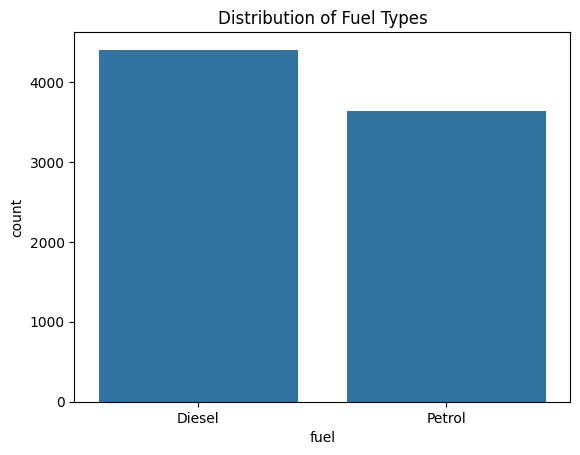

In [101]:
# Countplot for fuel type
sns.countplot(data=df, x='fuel')
plt.title("Distribution of Fuel Types")
plt.show()

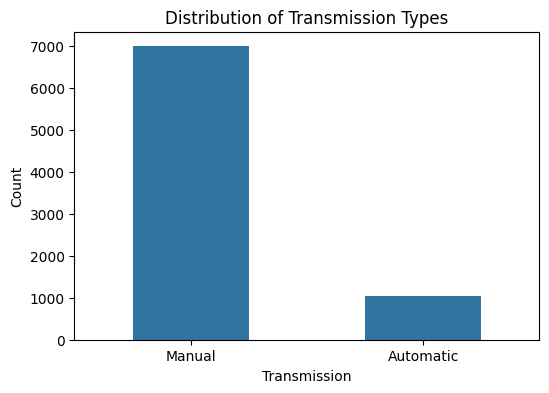

In [102]:
# Countplot for transmission type (improved)
plt.figure(figsize=(6,4))  # set figure size
sns.countplot(data=df, x='transmission', width=0.5)  # thinner bars
plt.title("Distribution of Transmission Types")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()

## 2.2 Multivariate analysis

### Boxplot: Car Price vs Transmission Type
We use a boxplot to compare the distribution of car selling prices for different transmission types 
(Manual vs Automatic).  
This helps us understand if one type tends to have higher or lower prices and also shows the spread 
and presence of outliers.

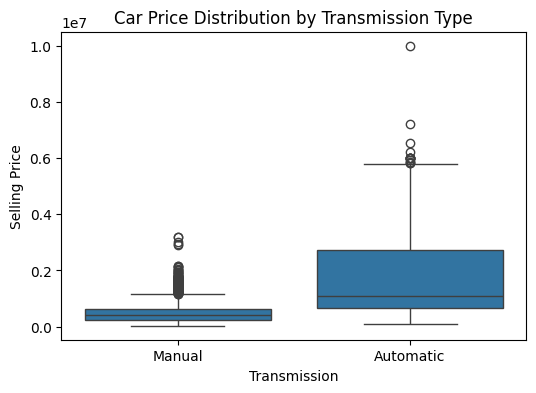

In [103]:
# Boxplot: Compare car prices by transmission type
plt.figure(figsize=(6,4))
sns.boxplot(x=df["transmission"], y=df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Transmission")
plt.title("Car Price Distribution by Transmission Type")
plt.show()

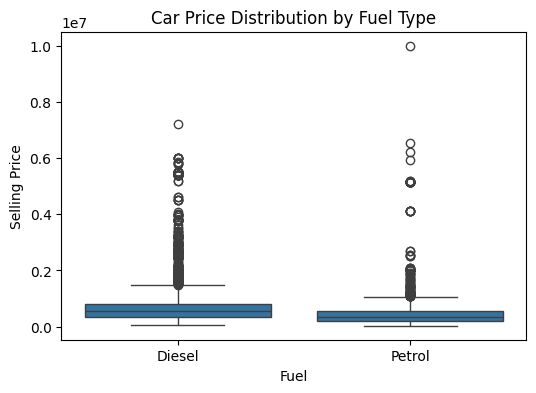

In [104]:
# Boxplot: Compare car prices by transmission type
plt.figure(figsize=(6,4))
sns.boxplot(x=df["fuel"], y=df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Fuel")
plt.title("Car Price Distribution by Fuel Type")
plt.show()

### Scatterplot

We use a scatterplot to explore the relationship between a car’s age (Year) and its selling price.  
Additionally, we color the points by fuel type (Diesel, Petrol, CNG, LPG) to see if different fuels  
show different pricing patterns.

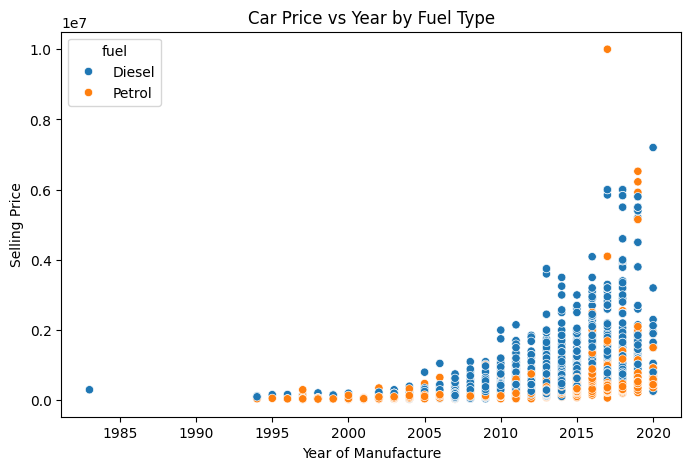

In [105]:
# Scatterplot: Car Year vs Selling Price, colored by Fuel Type
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["year"], y=df["selling_price"], hue=df["fuel"])
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Car Price vs Year by Fuel Type")
plt.show()

### Correlation Matrix (numeric features only)

**Goal:** Check linear relationships among *numeric* columns before any encoding.
`corr()` ignores text automatically, so this is a clean first look.

**How to read:**
- Values near **+1** → strong positive relation (both rise together)
- Values near **−1** → strong negative relation (one rises, the other falls)
- Values near **0** → weak/no linear relation

Focus on correlations with the target: **`selling_price`**.

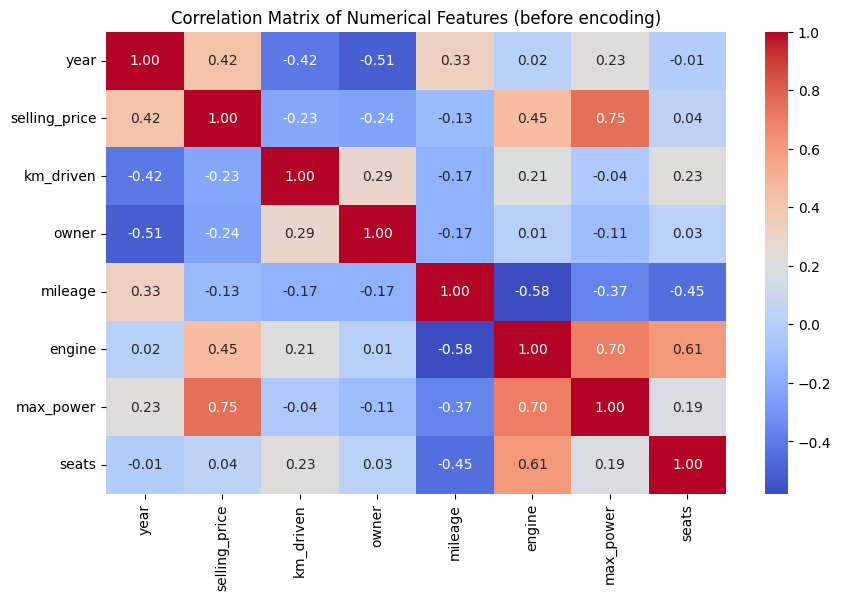

In [106]:
# Correlation among numeric columns only (pre-encoding)
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features (before encoding)")
plt.show()

### Label Encoding (categorical → integers)

**Why:** Models and correlation heatmaps can’t use text.  
We’ll convert a few clean categorical columns to integers:
- `fuel`, `seller_type`, `transmission`

In [107]:
from sklearn.preprocessing import LabelEncoder

to_encode = ['fuel', 'seller_type', 'transmission']
encoders = {}

for col in to_encode:
    if col in df.columns:                      # guard in case a column is missing
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

# (optional) show mappings so you know what each integer means
for col, le in encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col} mapping:", mapping)

fuel mapping: {'Diesel': np.int64(0), 'Petrol': np.int64(1)}
seller_type mapping: {'Dealer': np.int64(0), 'Individual': np.int64(1), 'Trustmark Dealer': np.int64(2)}
transmission mapping: {'Automatic': np.int64(0), 'Manual': np.int64(1)}


In [108]:
brand_label = LabelEncoder()
df.brand = brand_label.fit_transform(df.brand)

df.brand.unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   int64  
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   int64  
 5   seller_type    8033 non-null   int64  
 6   transmission   8033 non-null   int64  
 7   owner          8028 non-null   float64
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 815.9 KB


<Axes: >

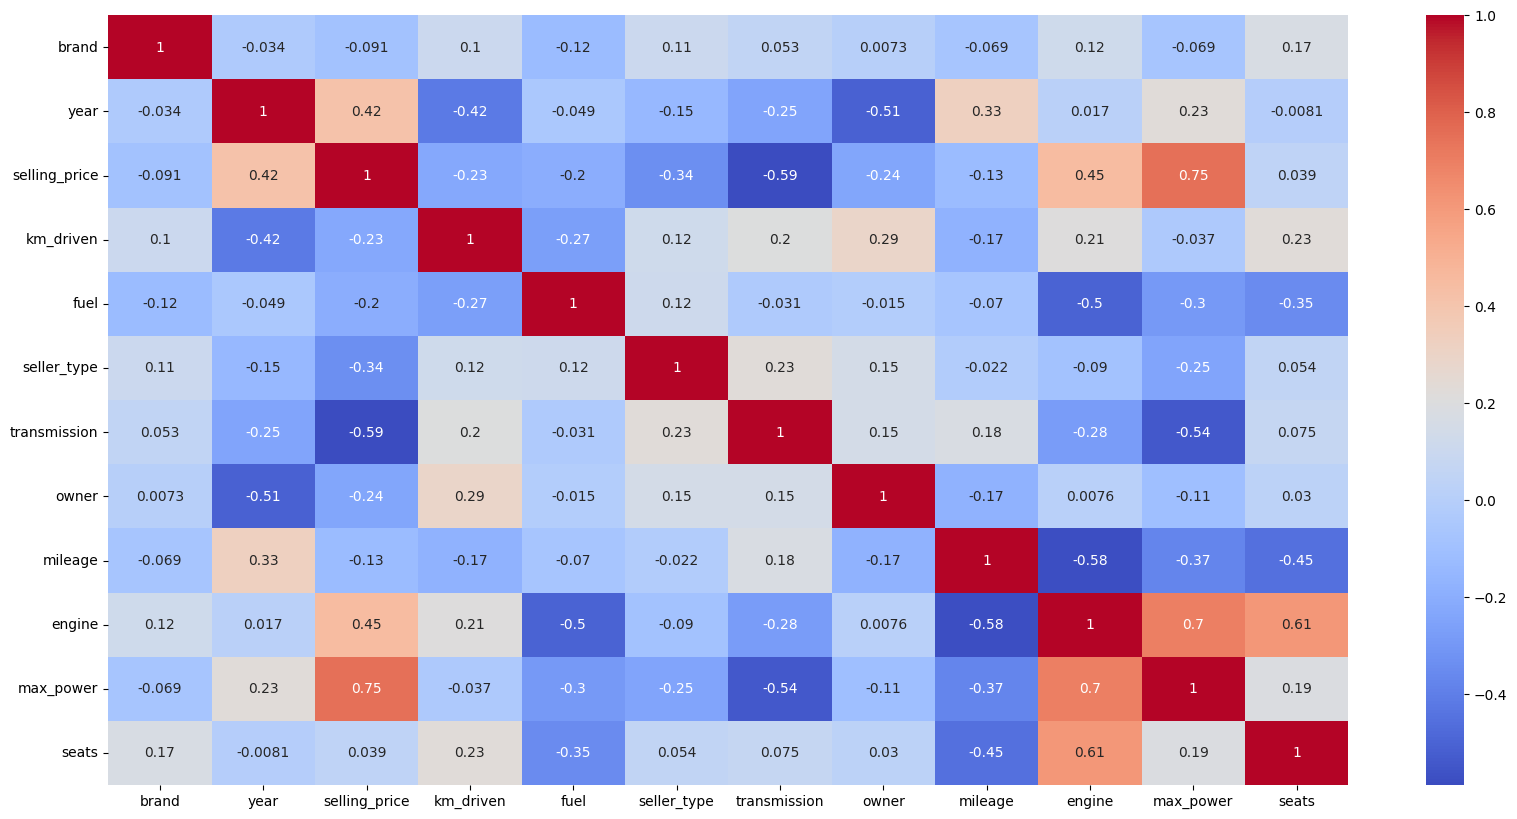

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

<Axes: ylabel='selling_price'>

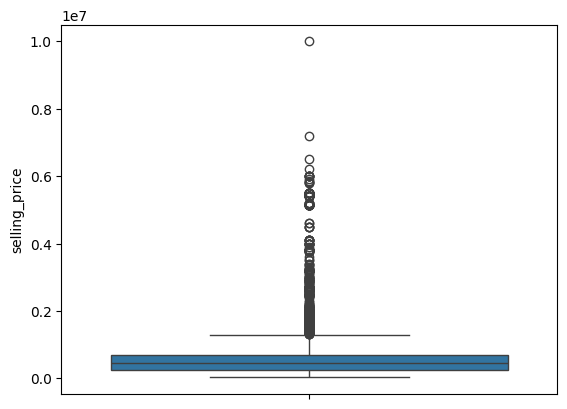

In [111]:
sns.boxplot(df['selling_price'])

### Heatmap including encoded features

Now that key categoricals are numeric, recompute correlations.
Again, focus on the **`selling_price`** row/column to see which features relate most to price.

# 3. Feature Selection


In [112]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [113]:
features = ['brand','year','mileage','max_power']

In [114]:
X = df[features]
y = df['selling_price']

In [115]:
type(X)

pandas.core.frame.DataFrame

In [116]:
X.head(5)

,brand,year,mileage,max_power
0,20,2014,23.40,74.00
1,27,2014,21.14,103.52
2,10,2006,17.70,78.00
3,11,2010,23.00,90.00
4,20,2007,16.10,88.20


In [117]:
y = np.log(df['selling_price'])

In [118]:
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8033, dtype: float64

In [119]:
type(y)

pandas.core.series.Series

# 4. Train–Test Split

We split the dataset into training and testing subsets:  
- **Training set** → used to train the model.  
- **Testing set** → used to evaluate how well the model generalizes to unseen data.  

We usually use 70–80% for training and 20–30% for testing.  

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (5623, 4)
Test set size: (2410, 4)


# 5. Processing
### 5.1 Check missing values
We always check for NaNs **after** the train–test split.  
- We only **fit** imputers on the **training** set to avoid data leakage.
- Then apply the same transform to the **test** set.

In [121]:
# Feature columns we're using right now


# Check NaNs in X
print("X_train missing:\n", X_train[features].isna().sum(), "\n")
print("X_test  missing:\n",  X_test[features].isna().sum(), "\n")

# Check NaNs in y
print("y_train missing:", y_train.isna().sum())
print("y_test  missing:", y_test.isna().sum())

X_train missing:
 brand          0
year           0
mileage      153
max_power    148
dtype: int64 

X_test  missing:
 brand         0
year          0
mileage      61
max_power    60
dtype: int64 

y_train missing: 0
y_test  missing: 0


### 5.2 Impute numeric columns
We'll use `SimpleImputer(strategy="median")` for robust numeric imputation.
- **Fit on `X_train`**, transform both `X_train` and `X_test`.  
- If `y` had missing values, we’d drop those rows (rare for a target).

In [122]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

imputer = SimpleImputer(strategy="median")
imputer.fit(X_train[features])             # fit on training only

X_train[features] = imputer.transform(X_train[features])
X_test[features]  = imputer.transform(X_test[features])

# If the target had NaNs (unlikely), drop them safely:
drop_train_idx = y_train[y_train.isna()].index
drop_test_idx  = y_test[y_test.isna()].index
if len(drop_train_idx) or len(drop_test_idx):
    X_train = X_train.drop(index=drop_train_idx)
    y_train = y_train.drop(index=drop_train_idx)
    X_test  = X_test.drop(index=drop_test_idx)
    y_test  = y_test.drop(index=drop_test_idx)

print("After imputation:")
print("X_train missing:\n", X_train[features].isna().sum(), "\n")
print("X_test  missing:\n",  X_test[features].isna().sum())

After imputation:
X_train missing:
 brand        0
year         0
mileage      0
max_power    0
dtype: int64 

X_test  missing:
 brand        0
year         0
mileage      0
max_power    0
dtype: int64


In [123]:
max_power = X_train['max_power'].median()
mileage = X_train['mileage'].mean()

###5.5 Scaling

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
X_train

array([[ 0.12734011, -0.19724035, -0.86366303, -0.83896914],
       [ 0.12734011, -0.44463774, -0.54556683,  0.23339605],
       [ 1.343705  , -0.93943251, -0.14094847, -0.04954991],
       ...,
       [ 0.26249177,  0.29755442,  0.36037115, -0.08463521],
       [ 0.26249177, -0.93943251,  0.0880808 , -1.28602376],
       [ 0.26249177, -0.93943251, -0.01370999, -0.27590668]],
      shape=(5623, 4))

In [126]:
print(X_train.shape)

(5623, 4)


In [127]:
intercept = np.ones((X_train.shape[0],1))
X_train = np.concatenate((intercept,X_train), axis = 1)

intercept = np.ones((X_test.shape[0],1))
X_test = np.concatenate((intercept,X_test),1)

In [128]:
X_train.shape

(5623, 5)

In [129]:
y_train

1495    12.899220
5818    12.611538
1281    12.154779
1421    12.278393
7173    12.971540
          ...    
5289    12.611538
5456    12.043554
865     13.527828
7696    12.154779
7361    12.771386
Name: selling_price, Length: 5623, dtype: float64

In [130]:
y_train.shape

(5623,)

In [131]:
type(y_train)

pandas.core.series.Series

In [132]:
y_train.isna().sum()

np.int64(0)

In [133]:
y_train = y_train.to_numpy()


In [134]:
!pip3 install mlflow

In [135]:
!pip3 show mlflow


Name: mlflow
Version: 3.3.2
Summary: MLflow is an open source platform for the complete machine learning lifecycle
Home-page: https://mlflow.org
Author: 
Author-email: 
License: Copyright 2018 Databricks, Inc.  All rights reserved.
        
                                        Apache License
                                   Version 2.0, January 2004
                                http://www.apache.org/licenses/
        
           TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION
        
           1. Definitions.
        
              "License" shall mean the terms and conditions for use, reproduction,
              and distribution as defined by Sections 1 through 9 of this document.
        
              "Licensor" shall mean the copyright owner or entity authorized by
              the copyright owner that is granting the License.
        
              "Legal Entity" shall mean the union of the acting entity and all
              other entities that control, ar

In [136]:
import sys
print(sys.executable)


/Users/mrkyaw/Documents/GitHub/Machine-Learning-Assignment-2/A_2/.venv/bin/python


In [137]:
import sys
!{sys.executable} -m pip install mlflow


In [138]:
import mlflow

In [139]:
import mlflow
import os

mlflow.set_tracking_uri("http://localhost:5001")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "kyaw"
# mlflow.create_experiment(name="kyaw_ML_A2")  

mlflow.set_experiment(experiment_name="kyaw_ML_A2") 

<Experiment: artifact_location='mlflow-artifacts:/895291307391458961', creation_time=1757758743662, experiment_id='895291307391458961', last_update_time=1757758743662, lifecycle_stage='active', name='kyaw_ML_A2', tags={}>

# 6. Model Selection
### 6.1 Linear Regression

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

class LinearRegression:
    def __init__(self, init_theta, alpha=0.01, method='batch', momentum=0.0, regularization=None,
                 num_epochs=500, batch_size=100, cv=None):
        
        self.init_theta_mode = init_theta  
        self.alpha = alpha
        self.method = method
        self.momentum = momentum 
        self.regularization = regularization
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.cv = cv if cv is not None else KFold(n_splits=5) 

        self.theta = None
        self.prev_step = 0
        

    def fit(self, X_train, y_train):
        self.old_val_loss = np.inf
        self.kfold_loss_scores = []
        self.kfold_r2_scores = []
        best_theta = None  

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            print(f"\n--- Fold {fold + 1} ---")

            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val = X_train[val_idx]
            y_cross_val = y_train[val_idx]

            
            if self.init_theta_mode == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])
            elif self.init_theta_mode == 'xavier':
                m = X_cross_train.shape[1] 
                bound = 1.0 / np.sqrt(m)
                self.theta = np.random.uniform(-bound, bound, size=(m,))
            else:
                raise ValueError("Unsupported init_theta. Use 'zero' or 'xavier'.")

            self.prev_step = 0  

            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):

                for epoch in range(self.num_epochs):
                    # Shuffle data
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_method_train = X_cross_train[perm]
                    y_method_train = y_cross_train[perm]

                    # Unified batch handling
                    if self.method == 'sto':
                        for i in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[i].reshape(1, -1)
                            y_method_train = y_cross_train[i]
                            train_loss = self._train(X_method_train, y_method_train)

                    elif self.method == 'mini_batch':
                        for i in range(0, X_cross_train.shape[0], self.batch_size):
                            X_method_train= X_cross_train[i:i + self.batch_size]
                            y_method_train = y_cross_train[i:i + self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)

                    elif self.method == 'batch':
                        train_loss = self._train(X_cross_train, y_cross_train)

                    mlflow.log_metric(key='train_loss', value=train_loss, step = epoch)

                    # Evaluate on validation set
                    y_val_pred = self._predict(X_cross_val)
                    val_mse = self._mse(y_val_pred, y_cross_val)
                    mlflow.log_metric(key='val_mse_loss',value= val_mse,step= epoch)

                    val_r2 = self._r2_score(y_val_pred, y_cross_val)
                    mlflow.log_metric(key='val_r2',value= val_r2,step= epoch)

                    # Early stopping check
                    if np.allclose(val_mse, self.old_val_loss):
                        print(f"Early stopping at epoch {epoch + 1}")
                        break
                    self.old_val_loss = val_mse

                    
                
                self.kfold_loss_scores.append(val_mse)
                self.kfold_r2_scores.append(val_r2)

                print(f"Fold {fold} MSE: {val_mse}")
                print(f"Fold {fold} R2: {val_r2}")
                
        print("\nTraining complete.")

    def _train(self, X, y):
        y_pred = X @ self.theta
        error = y_pred - y
        gradient = (1 / X.shape[0]) * X.T @ error

        # Apply regularization
        if self.regularization is not None:
            gradient += self.regularization.derivation(self.theta)

        # Update using momentum
        step = self.alpha * gradient
        self.theta = self.theta - step + self.momentum * self.prev_step
        self.prev_step = step
        return self._mse(y_pred,y)

    def _predict(self, X):
        return X @ self.theta  

    def _mse(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    
    def _avg_mse(self):
        return np.sum(np.array(self.kfold_loss_scores))/len(self.kfold_loss_scores)

    def _avg_r2_score(self):
        return np.sum(np.array(self.kfold_r2_scores))/len(self.kfold_r2_scores)

    def _r2_score(self, y_pred, y_true):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot

    def _coef(self):
        return self.theta[1:]

    def _intercept(self):
        return self.theta[0]

    def feature_importance(self, feature_names):
        # Fixed: method name typo, added feature_names as argument
        if self.theta is None:
            raise ValueError("Model is not trained yet.")

        importances = self._coef()
        sorted_idx = np.argsort(importances)

        # Fixed: spelling of 'columns', use feature_names input
        plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
        plt.xlabel("Feature Importance")
        plt.title("Linear Regression Feature Importances")
        plt.show()


### 6.2 Create a class for Regularizstion

(self, init_theta='zero', alpha=0.01, method='batch', momentum=0.0, regularization=None,
                 num_epochs=500, batch_size=100, cv=None):

In [141]:
#Lasso
class LassoPenalty:
    def __init__(self, l): #l = lamda
        self.l = l
        
    def __call__(self, init_theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(init_theta))
    
    def derivation(self, init_theta):
        return self.l * np.sign(init_theta)
    

#inherits LinearRegression and has separate classes for each of this regularization algorithm

class Lasso(LinearRegression):
    def __init__(self, init_theta, alpha,method, momentum,  l): # lr = learning rate, l = lamda
        self.regularization = LassoPenalty(l)
        super().__init__(init_theta, alpha,method, momentum,self.regularization)

In [142]:
#Ridge
class RidgePenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, init_theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(init_theta))
    
    def derivation(self, init_theta):
        return self.l * 2 * init_theta
    
class Ridge(LinearRegression):
    def __init__(self, init_theta, alpha,method, momentum, l):
        self.regularization = RidgePenalty(l)
        super().__init__(init_theta, alpha,method, momentum,self.regularization)

In [143]:
#Elastic
class ElasticPenalty:
    def __init__(self, l, l_ratio):
        self.l = l
        self.l_ratio = l_ratio
        
    def __call__(self, init_theta): #__call__ allows us to call class as method
        l1 = self.l_ratio * self.l * np.sum(np.abs(init_theta))
        l2 = (1 - self.l_ratio) * self.l * np.sum(np.square(init_theta)) 
        return (l1 + l2)
    
    def derivation(self, init_theta):
        l1 = self.l * self.l_ratio * np.sign(init_theta)
        l2 = 2 * self.l * (1 - self.l_ratio) * init_theta
        return (l1 + l2)
    
class Elastic(LinearRegression):
    def __init__(self, init_theta, alpha,method, momentum, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(init_theta, alpha,method, momentum,self.regularization)

In [144]:
class NoRegularization:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, init_theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, init_theta): # return 0, since we won't have any regularization.
        return 0
    
class Normal(LinearRegression):
    # self, init_theta, alpha,method, momentum, l
    def __init__(self, init_theta, alpha, method, momentum,l):
        self.regularization = NoRegularization(l)
        super().__init__(init_theta, alpha,method, momentum,self.regularization)

    def _init_(self, init_theta, alpha, method,momentum, regularization , num_epochs = 500, batch_size = 100 ,cv = kfold):


### 6.3 Experiment

In [145]:
def str_to_class(class_name):
    import sys
    try:
        return getattr(sys.modules[__name__], class_name)
    except AttributeError:
        raise ValueError(f"Class '{class_name}' not found.")


def __init__(self, init_theta, alpha,method, momentum, l):

In [146]:
from sklearn.preprocessing import PolynomialFeatures

poly-degree-True, init_theta-xavier, learning_rate-0.0001, method-batch, momentum-1,reg-Ridge

In [151]:
polys = [True,False]
regs = ['Normal','Lasso','Ridge']
momentums = [0,1]
methods = ['sto','mini_batch','batch']
init_thetas = ['zero','xavier']
alphas = [0.001,0.0001]

Polynomial Degree: True
======== Initial theta: zero
======== alpha (Learning rate): 0.0001
======== Method: batch
======== Momentum 1
======== Regularization: Ridge
===== Ridge =====


Polynomial Degree: False
======== Initial theta: xavier
======== alpha (Learning rate): 0.0001
======== Method: mini_batch
======== Momentum 0
======== Regularization: Ridge
===== Ridge =====

Polynomial Degree: False
======== Initial theta: xavier
======== alpha (Learning rate): 0.0001
======== Method: batch
======== Momentum 0
======== Regularization: Lasso
===== Lasso =====

In [153]:
type(y_train)

numpy.ndarray

 def __init__(self, init_theta, alpha,method, momentum,  l):

In [154]:
for poly in polys:
    for init_theta in init_thetas:
        for alpha in alphas:
            for method in methods:
                for momentum in momentums:
                    for reg in regs:
                        
                        print("=" * 30)
                        print(f"Polynomial Degree: {poly}")
                        print(f"======== Initial theta: {init_theta}")
                        print(f"======== alpha (Learning rate): {alpha}")
                        print(f"======== Method: {method}")
                        print(f"======== Momentum {momentum}")
                        print(f"======== Regularization: {reg}")

                        mlflow_parms = {
                                        "poly": poly,
                                        "init_theta": init_theta,
                                        "alpha": alpha,
                                        "method":method,
                                        "momentum": momentum,
                                        "reg" : reg
                                        }
                        
                        params = {
                                    "init_theta": init_theta,
                                    "alpha": alpha,
                                    "method":method,
                                    "momentum": momentum,
                                    "l":0.1
                                }
                        
                        run = f"poly-degree-{poly}, init_theta-{init_theta}, learning_rate-{alpha}, method-{method}, momentum-{momentum},reg-{reg}"

                        mlflow.start_run(run_name= run, nested=True)
                        mlflow.log_params(params=mlflow_parms)

                        print("=" *5, reg, "="*5)

                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                        model = type_of_regression(**params)
                        
                        if poly:
                            poly_X_train = PolynomialFeatures(degree = 1).fit_transform(X_train)
                            model.fit(poly_X_train, y_train)
                        else:
                            model.fit(X_train, y_train)
                        
                        avg_train_mse  = model._avg_mse()
                        avg_train_r2 = model._avg_r2_score()

                        print("Average MSE: ", avg_train_mse)
                        mlflow.log_metric(key="training_mse", value=avg_train_mse)

                        print("Average R2: ", avg_train_r2)
                        mlflow.log_metric(key="training_r2", value=avg_train_r2)
                    
                        mlflow.end_run()
                        
                        

Polynomial Degree: True
======== Initial theta: zero
======== alpha (Learning rate): 0.001
======== Method: sto
======== Momentum 0
======== Regularization: Normal
===== Normal =====

--- Fold 1 ---
Early stopping at epoch 6
Fold 0 MSE: 0.11893931057058696
Fold 0 R2: 0.8302464607386038
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/895291307391458961/runs/c0322da7690d467e808a9d10c990e59c
🧪 View experiment at: http://localhost:5001/#/experiments/895291307391458961

--- Fold 2 ---
Early stopping at epoch 5
Fold 1 MSE: 0.12816495472100195
Fold 1 R2: 0.8196659061830751
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/895291307391458961/runs/6dcaff6154e246e3b401fc4b8d1e0c23
🧪 View experiment at: http://localhost:5001/#/experiments/895291307391458961

--- Fold 3 ---
Early stopping at epoch 5
Fold 2 MSE: 0.1271260982350981
Fold 2 R2: 0.8199734914233517
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/895291307391458961/runs/b3203872deee4519a10f4660a6bd3c91
🧪 View 

# Best model with Best parameters

In [ ]:
import math

polys = [False]
regs = ['Ridge']
momentums = [0]
methodz = ['sto']
init_thetas = ['zero']
alphas = [0.001]

for poly in polys:
    for init_theta in init_thetas:
        for alpha in alphas:
            for method in methods:
                for momentum in momentums:
                    for reg in regs:
                        
                        params = {
                                    "init_theta": init_theta,
                                    "alpha": alpha,
                                    "method":method,
                                    "momentum": momentum,
                                    "l":0.1
                                }
                        
                        current_run = f"polynomial-{poly}-reg-{reg}-momemtum{momentum}-method-{method}-theta-{init_theta}-learning_rate-{alpha}"

                        print("="*5, current_run, "="*5)

                        ########
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                        model1 = type_of_regression(**params)
                        
                        if poly:
                            poly_X_train = PolynomialFeatures(degree = 1).fit_transform(X_train)
                            model1.fit(poly_X_train, y_train)
                        else:
                            model1.fit(X_train, y_train)
                        
                        train_mse  = model1._avg_mse()
                        train_r2 = model1._avg_r2_score()

                        print("Training MSE: ", train_mse)

                        print("Training R2: ", train_r2)

===== polynomial-False-reg-Ridge-momemtum0-method-sto-theta-zero-learning_rate-0.001 =====

--- Fold 1 ---
Early stopping at epoch 2
Fold 0 MSE: 160.6276795123127
Fold 0 R2: -228.25235542186965
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/895291307391458961/runs/f39e75c9c3ea4b71aef142fd0ae74975
🧪 View experiment at: http://localhost:5001/#/experiments/895291307391458961

--- Fold 2 ---
Early stopping at epoch 2
Fold 1 MSE: 162.8754522507347
Fold 1 R2: -228.17338948542522
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/895291307391458961/runs/2acda98fd10944fa941d7df6ffc946b8
🧪 View experiment at: http://localhost:5001/#/experiments/895291307391458961

--- Fold 3 ---
Early stopping at epoch 2
Fold 2 MSE: 160.54627566179934
Fold 2 R2: -226.3536738217784
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/895291307391458961/runs/ea52ed463fd5439f857cdf299e38dc33
🧪 View experiment at: http://localhost:5001/#/experiments/895291307391458961

--- Fold 4 ---
Early st

In [169]:
import math

polys = [True]
regs = ['Ridge']
momentums = [0]
methodz = ['sto']
init_thetas = ['xavier']
alphas = [0.001]

for poly in polys:
    for init_theta in init_thetas:
        for alpha in alphas:
            for method in methods:
                for momentum in momentums:
                    for reg in regs:
                        
                        params = {
                                    "init_theta": init_theta,
                                    "alpha": alpha,
                                    "method":method,
                                    "momentum": momentum,
                                    "l":0.1
                                }
                        
                        current_run = f"polynomial-{poly}-reg-{reg}-momemtum{momentum}-method-{method}-theta-{init_theta}-learning_rate-{alpha}"

                        print("="*5, current_run, "="*5)

                        ########
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                        model1 = type_of_regression(**params)
                        
                        if poly:
                            poly_X_train = PolynomialFeatures(degree = 1).fit_transform(X_train)
                            model1.fit(poly_X_train, y_train)
                        else:
                            model1.fit(X_train, y_train)
                        
                        train_mse  = model1._avg_mse()
                        train_r2 = model1._avg_r2_score()

                        print("Training MSE: ", train_mse)

                        print("Training R2: ", train_r2)

===== polynomial-True-reg-Ridge-momemtum0-method-sto-theta-xavier-learning_rate-0.001 =====

--- Fold 1 ---
Early stopping at epoch 4
Fold 0 MSE: 1.4857175894448877
Fold 0 R2: -1.1204580549632746
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/895291307391458961/runs/e21342130eca4e1aafa87f81561901d8
🧪 View experiment at: http://localhost:5001/#/experiments/895291307391458961

--- Fold 2 ---
Early stopping at epoch 3
Fold 1 MSE: 1.5867445496590271
Fold 1 R2: -1.232623895546197
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/895291307391458961/runs/64622e3ecb644a788f2f9bb1e5060302
🧪 View experiment at: http://localhost:5001/#/experiments/895291307391458961

--- Fold 3 ---
Early stopping at epoch 4
Fold 2 MSE: 1.5343143401264283
Fold 2 R2: -1.1727816518149403
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/895291307391458961/runs/1939f8934593458782ebfb47cabfd3cf
🧪 View experiment at: http://localhost:5001/#/experiments/895291307391458961

--- Fold 4 ---
Early

KeyboardInterrupt: 

# 7. Testing

In [167]:
y_pred = model._predict(X_test)
mse = model._mse(y_pred,y_test)
print(f"MSE :{mse}")
r2_score = model._r2_score(y_pred,y_test)
print(f"R2 score :{r2_score}")



MSE :167.49113403308633
R2 score :-241.5629236060314


# 7. Model visualization

To evaluate our baseline model, we compare the actual vs predicted car prices.  
A simple scatter plot helps us see how close predictions are to the real values.

# Feature Importance

In [ ]:
model.feature_importance()

In [ ]:
plt.barh(X.columns, model.feature_importance)

In [ ]:
X.columns

# Inference

In [ ]:
import pickle

model ={'model': model,
        'scaler' : scaler,
        'brand': brand_label,
        'year' : 2017,
        'mileage': 20,
        'max_power': 90
        }

filename = 'assignment2.model'
pickle.dump(model, open(filename,'wb'))

In [ ]:
loaded_file = pickle.load(open(filename,'rb'))
loaded_model = loaded_file['model']
loaded_scaler = loaded_file['scaler']

In [ ]:
brand_label.classes_

In [ ]:
df[['brand', 'year', 'mileage', 'max_power']].loc[15]

In [ ]:
df['selling_price'].loc[15]

np.int64(400000)

In [ ]:
testing_np = np.array([[19,2016,18.15,82]])
testing = loaded_scaler.transform(testing_np)
testing

In [ ]:
predicted_price = loaded_model.predict(testing)
predicted_price = np.exp(predicted_price)
predicted_price